Least cost path from A to G: A -> B -> D -> G with total cost 4


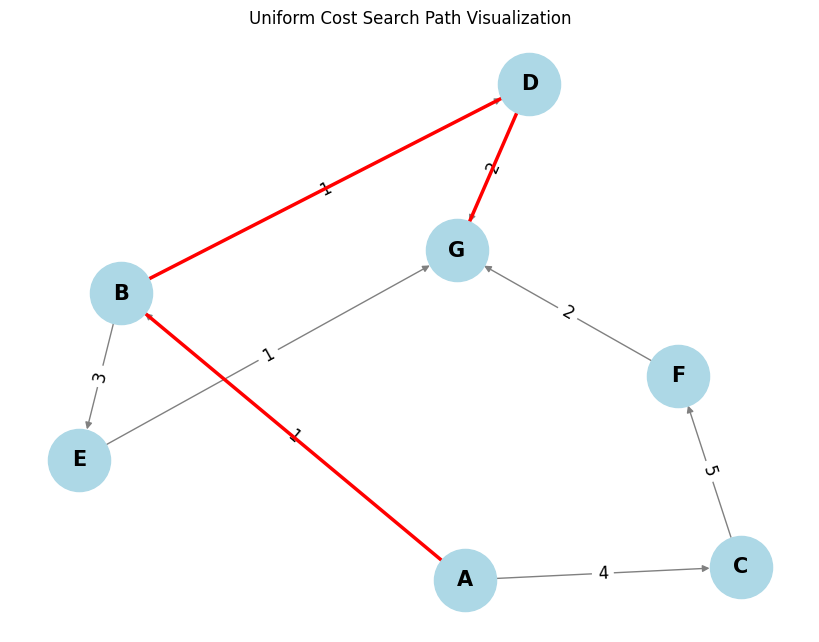

In [1]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def uniform_cost_search(graph, start, goal):
    # Priority queue to store the frontier nodes, initialized with the start node
    priority_queue = [(0, start)]
    # Dictionary to store the cost of the shortest path to each node
    visited = {start: (0, None)}

    while priority_queue:
        # Pop the node with the lowest cost from the priority queue
        current_cost, current_node = heapq.heappop(priority_queue)

        # If we reached the goal, return the total cost and the path
        if current_node == goal:
            return current_cost, reconstruct_path(visited, start, goal)

        # Explore the neighbors
        for neighbor, cost in graph[current_node]:
            total_cost = current_cost + cost
            # Check if this path to the neighbor is better than any previously found
            if neighbor not in visited or total_cost < visited[neighbor][0]:
                visited[neighbor] = (total_cost, current_node)
                heapq.heappush(priority_queue, (total_cost, neighbor))

    # If the goal is not reachable, return None
    return None

def reconstruct_path(visited, start, goal):
    # Reconstruct the path from start to goal by following the visited nodes
    path = []
    current = goal
    while current is not None:
        path.append(current)
        current = visited[current][1]  # Get the parent node
    path.reverse()
    return path

def visualize_graph(graph, path=None):
    G = nx.DiGraph()

    # Adding nodes and edges to the graph
    for node, edges in graph.items():
        for neighbor, cost in edges:
            G.add_edge(node, neighbor, weight=cost)

    pos = nx.spring_layout(G)  # Positioning the nodes

    # Drawing the graph
    plt.figure(figsize=(8, 6))
    nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=15, font_weight='bold', edge_color='gray')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=12)

    if path:
        # Highlight the path in red
        path_edges = list(zip(path, path[1:]))
        nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='red', width=2.5)

    plt.title("Uniform Cost Search Path Visualization")
    plt.show()

# Example graph represented as an adjacency list
graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('D', 1), ('E', 3)],
    'C': [('F', 5)],
    'D': [('G', 2)],
    'E': [('G', 1)],
    'F': [('G', 2)],
    'G': []
}

# Example usage of the UCS function
start_node = 'A'
goal_node = 'G'
result = uniform_cost_search(graph, start_node, goal_node)

if result:
    total_cost, path = result
    print(f"Least cost path from {start_node} to {goal_node}: {' -> '.join(path)} with total cost {total_cost}")
    visualize_graph(graph, path)
else:
    print(f"No path found from {start_node} to {goal_node}")